In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pyproj

In [2]:
# # gw50m
answer_location = (52.53962045830213, 13.419884901364885, 50)
source_locations = [(52.542509627168, 13.42523777393717, 23), (52.538449358627645, 13.417154706545864, 23), (52.54124707715658, 13.42007143605056, 23), (52.53863682156572, 13.423243543905807, 5.1), (52.54022829654233, 13.424028618727982, 23), (52.53768690920158, 13.423827698593255, 19), (52.53701243697258, 13.41926365424317, 23), (52.53765506974833, 13.416535624425991, 23), (52.540951204354315, 13.414768595630743, 19), (52.53846109447526, 13.42080118586715, 23)]
rssi = np.array([-73.54774707124031, -67.2598116355535, -65.27220428570674, -74.73454353002585, -68.84323573826707, -70.71299630957999, -69.14659573310989, -69.70525715798875, -74.09346777134436, -63.18224654815296])
d = []
# rssi to distance with curve fit
for i in range(len(rssi)):
    d.append(10**((-18.67881 - rssi[i]) / (10 * 2.04002)))
print(d)

# gw100m
# answer_location = (52.53962045830213, 13.419884901364885, 100)
# source_locations = [(52.542509627168, 13.42523777393717, 23), (52.538449358627645, 13.417154706545864, 23), (52.54124707715658, 13.42007143605056, 23), (52.53863682156572, 13.423243543905807, 5.1), (52.54022829654233, 13.424028618727982, 23), (52.53768690920158, 13.423827698593255, 19), (52.53701243697258, 13.41926365424317, 23), (52.53765506974833, 13.416535624425991, 23), (52.540951204354315, 13.414768595630743, 19), (52.53846109447526, 13.42080118586715, 23)]
# rssi = np.array([-73.94630524200359, -67.04524365136507, -65.51133843649966, -71.99102431036357, -69.38046352414914, -70.69053819851595, -69.09353142802274, -69.9814290434943, -71.63403554811134, -63.81425676768592])
# d = []
# for i in range(len(rssi)):
#     d.append(10**((-18.67881 - rssi[i]) / (10 * 2.04002)))
# print(d)

# # gw100m_nobuilding
# answer_location = (52.53962045830213, 13.419884901364885, 200)
# source_locations = [(52.542509627168, 13.42523777393717, 23), (52.538449358627645, 13.417154706545864, 23), (52.54124707715658, 13.42007143605056, 23), (52.53863682156572, 13.423243543905807, 5.1), (52.54022829654233, 13.424028618727982, 23), (52.53768690920158, 13.423827698593255, 19), (52.53701243697258, 13.41926365424317, 23), (52.53765506974833, 13.416535624425991, 23), (52.540951204354315, 13.414768595630743, 19), (52.53846109447526, 13.42080118586715, 23)]
# rssi = np.array([-73.58976692127023, -66.84978429622258, -65.43775615882458, -68.51723739248007, -69.34638664552159, -70.67158737502467, -69.47921756875596, -69.74188545126589, -71.33057463016215, -63.86118311152556])
# d = []
# for i in range(len(rssi)):
#     d.append(10**((-18.67881 - rssi[i]) / (10 * 2.04002)))
# print(d)

[489.3588074217971, 240.65689095825144, 192.2947928449276, 559.5039227350577, 287.7506871248685, 355.36152157821056, 297.7740251687397, 317.15525160163276, 520.4489797985229, 151.88665572438723]


Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
N

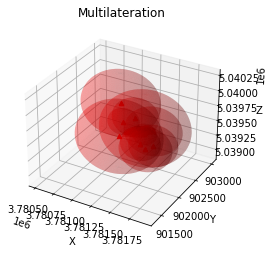

455.3264721847198


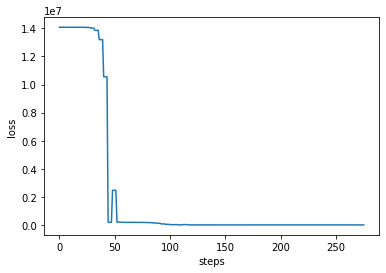

In [3]:
# multilateration program

errors_array = []
loss_array = []

R = 6371000 # radius of the earth in meters

# GPS coordinates of the sources
# source_locations = [
#     (46.048174, 11.134445, 0),  # Source 1
#     (46.048275, 11.134562, 0),  # Source 2
#     (46.048389, 11.134393, 0),  # Source 3
#     (46.048431, 11.134557, 0)  # Source 4
# ]

# Distances from the receiver to the sources
# d = np.array([7.5, 7.2, 9.8, 9.4])

# Convert GPS coordinates to Cartesian coordinates
def to_cartesian(lat, lon, alt):
    x, y, z = pyproj.Transformer.from_crs(4979, 4978, always_xy=True).transform(lon, lat, alt)
    return x, y, z

# # Convert GPS coordinates to Cartesian coordinates
def to_cartesian_2d(lat, lon):
    # Calculate UTM zone from longitude
    zone = int((lon + 180) / 6) + 1
    # Determine if the point is in the Northern or Southern hemisphere
    hemisphere = 'north' if lat >= 0 else 'south'

    # define the coordinate systems
    transformer = pyproj.Transformer.from_crs("epsg:4326", f"epsg:326{zone if lat >= 0 else zone + 100}")

    x, y = transformer.transform(lat, lon)
    return x, y

# Convert Cartesian coordinates to GPS coordinates
def to_gps(x, y, z):
    lon, lat, alt = pyproj.Transformer.from_crs(4978,4979, always_xy=True).transform(x, y, z)
    return lat, lon, alt

# Calculate the distance between the receiver and each source
def distance(xyz_receiver, xyz_source):
    return np.linalg.norm(xyz_source - xyz_receiver)

delta = 1  # Huber parameter, can be tuned

def huber_loss(errors):
    return np.where(np.abs(errors) < delta, 0.5 * errors**2, delta * (np.abs(errors) - 0.5 * delta))

def error(xyz_receiver, xyz_sources, d):
    distances = np.linalg.norm(xyz_sources - xyz_receiver, axis=1)
    errors = distances - d
    large_errors = np.abs(errors) >= delta
    print('Number of large errors:', np.sum(large_errors))
    loss_array.append(np.sum(huber_loss(errors)))
    errors_array.append(np.sqrt(errors**2))
    return np.sum(huber_loss(errors))

# Define a function to convert radians to degrees
def degrees(rad):
    return rad * 180 / np.pi

# Starting GPS coordinates of the receiver (can be anywhere)
receiver_location = (40.048174, 10.134445, 0)

# Convert the GPS coordinates of the sources and the receiver to Cartesian coordinates
xyz_sources = np.array([to_cartesian(*source_location) for source_location in source_locations])
xyz_receiver = np.array(to_cartesian(*receiver_location))

# Perform multilateration to estimate the location of the receiver
result = minimize(error, xyz_receiver, args=(xyz_sources, d))
xyz_receiver_estimated = result.x

# Convert the estimated Cartesian coordinates of the receiver back to GPS coordinates
receiver_location_estimated = to_gps(*xyz_receiver_estimated)

print('Receiver location:', receiver_location_estimated)
print('error to the truth in 3d', np.linalg.norm(to_cartesian(*answer_location)-xyz_receiver_estimated))
print('error to the truth in 2d', np.linalg.norm(np.array(to_cartesian_2d(*answer_location[:2])) - np.array(to_cartesian_2d(*receiver_location_estimated[:2]))))

# Plot the sources and the estimated location of the receiver
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the sources
for i in range(len(source_locations)):
    x, y, z = to_cartesian(*source_locations[i])
    ax.scatter(x, y, z, color='r', marker='^')

# Plot the estimated location of the receiver
x, y, z = to_cartesian(*receiver_location_estimated)
ax.scatter(x, y, z, color='b', marker='o')

# Set the labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Multilateration')

print(source_locations)
# Plot circles (or spheres) representing the distance from each source
for i in range(len(source_locations)):
    # Calculate the radius of the circle (or sphere) in meters
    radius = d[i]
    # Get the Cartesian coordinates of the source
    x, y, z = to_cartesian(*source_locations[i])
    # Create a grid of points on the surface of the sphere
    # Sphere in 3D
    u = np.linspace(0, 2*np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    X = x + radius*np.outer(np.cos(u), np.sin(v))
    Y = y + radius*np.outer(np.sin(u), np.sin(v))
    Z = z + radius*np.outer(np.ones_like(u), np.cos(v))
    ax.plot_surface(X, Y, Z, color='r', alpha=0.2)

plt.show()

# create a figure for error
fig = plt.figure()

plt.plot(loss_array)
plt.xlabel("steps")
plt.ylabel("loss")
print(loss_array[-1])

# show the plot
plt.show()

import folium

# Plot the sources and the estimated location of the receiver on a 2D map
m = folium.Map(location=receiver_location_estimated[:2], zoom_start=18, max_zoom=20)

# Plot the sources
for i in range(len(source_locations)):
    folium.Marker(location=source_locations[i][:2]).add_to(m)

# Plot the estimated location of the receiver
folium.Marker(location=receiver_location_estimated[:2], icon=folium.Icon(color='purple')).add_to(m)

# answer
folium.Marker(location=answer_location[:2], icon=folium.Icon(color='green')).add_to(m)

# Plot circles representing the distance from each source
for i in range(len(source_locations)):
    # Calculate the radius of the circle in meters
    radius = d[i]
    # Get the location of the source
    source_location = source_locations[i][:2]
    # Draw the circle on the map
    folium.Circle(location=source_location, radius=radius, color='red', fill=False).add_to(m)

m



In [4]:
# create every pattern of 4 or more beacons
import itertools

source_locations_iter = []
d_iter = []
for n in range(4,len(source_locations)+1):
	for source_location in itertools.combinations(source_locations, n):
	    source_locations_iter.append(list(source_location))
	    
for n in range(4,len(d)+1):
	for d_i in itertools.combinations(d, n):
	    d_iter.append(list(d_i))
print(source_locations_iter)
print(d_iter)

[[(52.542509627168, 13.42523777393717, 23), (52.538449358627645, 13.417154706545864, 23), (52.54124707715658, 13.42007143605056, 23), (52.53863682156572, 13.423243543905807, 5.1)], [(52.542509627168, 13.42523777393717, 23), (52.538449358627645, 13.417154706545864, 23), (52.54124707715658, 13.42007143605056, 23), (52.54022829654233, 13.424028618727982, 23)], [(52.542509627168, 13.42523777393717, 23), (52.538449358627645, 13.417154706545864, 23), (52.54124707715658, 13.42007143605056, 23), (52.53768690920158, 13.423827698593255, 19)], [(52.542509627168, 13.42523777393717, 23), (52.538449358627645, 13.417154706545864, 23), (52.54124707715658, 13.42007143605056, 23), (52.53701243697258, 13.41926365424317, 23)], [(52.542509627168, 13.42523777393717, 23), (52.538449358627645, 13.417154706545864, 23), (52.54124707715658, 13.42007143605056, 23), (52.53765506974833, 13.416535624425991, 23)], [(52.542509627168, 13.42523777393717, 23), (52.538449358627645, 13.417154706545864, 23), (52.54124707715

[[47.255528920318696, 199.4585764588372, 4, 47.81665994163868, 3.1458866378931662, 187.5168702686257], [1.66068183299803, 35.30825467015997, 4, 2.1819629953945667, 198.8680701665858, 5.183213615369441], [0.37792142127946704, 48.49888426370019, 4, 0.13638754759293886, 8.335363151986577, 0.3228523276006171], [1.863219276265589, 34.790614027891166, 4, 1.5910848424649304, 4.275875324194175, 5.534925599007799], [2.5168676176001625, 48.34227623121072, 4, 3.6486269712906076, 3.3765561592501405, 8.798775775937706], [31.03083156109397, 65.6173353718452, 4, 35.43042184628913, 4.674589589527015, 122.38657644637212], [1.6033964245374435, 89.6248071332841, 4, 1.828046681419248, 61.101280574886424, 4.758559441158507], [67.64944752060558, 97.41129707953073, 4, 88.24587377994672, 7.417748607604328, 268.8907067897511], [71.99129396564003, 51.67286209867634, 4, 123.78988649727614, 96.50393142564825, 286.43814988014924], [71.16059941881474, 91.88064676072966, 4, 88.9357398524834, 3.935698693802111, 283.1

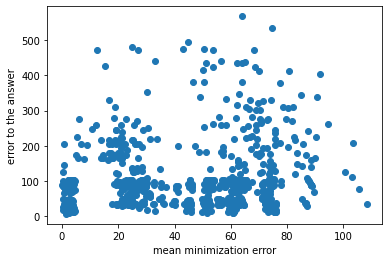

In [5]:
# multilateration with every patterns

errors_array = []
loss_array = []

R = 6371000 # radius of the earth in meters

# GPS coordinates of the sources
# source_locations = [
#     (46.048174, 11.134445, 0),  # Source 1
#     (46.048275, 11.134562, 0),  # Source 2
#     (46.048389, 11.134393, 0),  # Source 3
#     (46.048431, 11.134557, 0)  # Source 4
# ]

# Distances from the receiver to the sources
# d = np.array([7.5, 7.2, 9.8, 9.4])

# Convert GPS coordinates to Cartesian coordinates
def to_cartesian(lat, lon, alt):
    x, y, z = pyproj.Transformer.from_crs(4979, 4978, always_xy=True).transform(lon, lat, alt)
    return x, y, z

# Convert Cartesian coordinates to GPS coordinates
def to_gps(x, y, z):
    lon, lat, alt = pyproj.Transformer.from_crs(4978,4979, always_xy=True).transform(x, y, z)
    return lat, lon, alt

# Calculate the distance between the receiver and each source
def distance(xyz_receiver, xyz_source):
    return np.linalg.norm(xyz_source - xyz_receiver)

delta = 1  # Huber parameter, can be tuned

def huber_loss(errors):
    return np.where(np.abs(errors) < delta, 0.5 * errors**2, delta * (np.abs(errors) - 0.5 * delta))

def error(xyz_receiver, xyz_sources, d):
    distances = np.linalg.norm(xyz_sources - xyz_receiver, axis=1)
    errors = distances - d
    loss_array.append(np.sum(huber_loss(errors)))
    errors_array.append(np.sqrt(errors**2))
    return np.sum(huber_loss(errors))

# Define a function to convert radians to degrees
def degrees(rad):
    return rad * 180 / np.pi

xyz_receiver_estimated_list = []
receiver_locations_estimated = []
error_answer_minimization = []

for i in range(len(d_iter)):

    source_locations = source_locations_iter[i]
    d_comb = d_iter[i]

    # Starting GPS coordinates of the receiver (can be anywhere)
    receiver_location = (40.048174, 10.134445, 0)

    # Convert the GPS coordinates of the sources and the receiver to Cartesian coordinates
    xyz_sources = np.array([to_cartesian(*source_location) for source_location in source_locations])
    xyz_receiver = np.array(to_cartesian(*receiver_location))

    # Perform multilateration to estimate the location of the receiver
    result = minimize(error, xyz_receiver, args=(xyz_sources, d_comb))
    xyz_receiver_estimated = result.x
    xyz_receiver_estimated_list.append(xyz_receiver_estimated)

    error_answer = np.linalg.norm(to_cartesian(*answer_location)-xyz_receiver_estimated)
    error_answer_2d = np.linalg.norm(np.array(to_cartesian_2d(*answer_location[:2])) - np.array(to_cartesian_2d(*receiver_location_estimated[:2])))
    error_answer_minimization.append([np.mean(errors_array[-1]), error_answer, len(d_comb), np.std(errors_array[-1]), error_answer_2d, loss_array[-1]])
    
    # Convert the estimated Cartesian coordinates of the receiver back to GPS coordinates
    receiver_location_estimated = to_gps(*xyz_receiver_estimated)
    receiver_locations_estimated.append(receiver_location_estimated)

    # print('Receiver location:', xyz_receiver_estimated)
    # print('Receiver location:', receiver_location_estimated)
    # print('error', np.sum(errors_array[-1]))

print(error_answer_minimization)
error_answer_minimization.sort(key=lambda item: item[0])
plt.scatter([item[0] for item in error_answer_minimization], [item[1] for item in error_answer_minimization])
plt.xlabel("mean minimization error")
plt.ylabel("error to the answer")
plt.show()

import folium

# Plot the sources and the estimated location of the receiver on a 2D map
m = folium.Map(location=receiver_location_estimated[:2], zoom_start=18, max_zoom=20)

# Plot the sources
for i in range(len(source_locations)):
    folium.Marker(location=source_locations[i][:2]).add_to(m)

for i in range(len(receiver_locations_estimated)):
# Plot the estimated location of the receiver
    folium.Marker(location=receiver_locations_estimated[i][:2], icon=folium.Icon(color='purple'), tooltip=f'Point {i}').add_to(m)

# answer
folium.Marker(location=answer_location[:2], icon=folium.Icon(color='green')).add_to(m)

# Plot circles representing the distance from each source
for i in range(len(source_locations)):
    # Calculate the radius of the circle in meters
    radius = d[i]
    # Get the location of the source
    source_location = source_locations[i][:2]
    # Draw the circle on the map
    folium.Circle(location=source_location, radius=radius, color='red', fill=False).add_to(m)

m



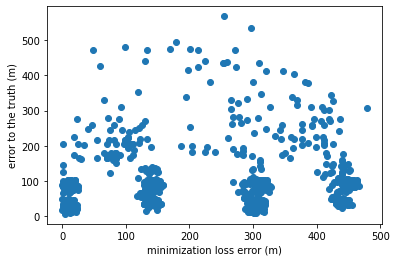

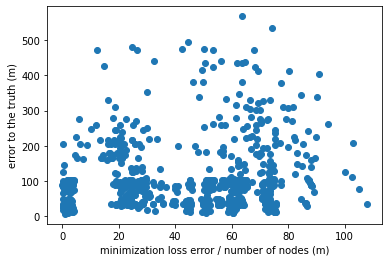

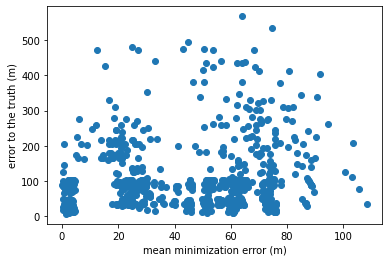

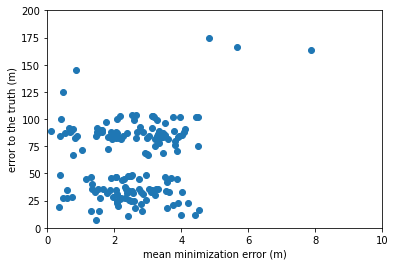

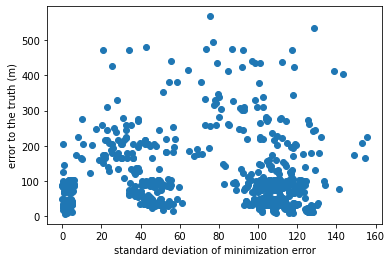

[]
[[88.87251816470949, 19.477238847458406, 84.89120857547466, 48.49888426370019, 100.14098576904222, 124.81903881856559, 27.183343256783612, 86.88814466046118, 27.799672002879106, 91.56045154283406, 87.7285298031624, 88.64066760803371, 206.1734829827762, 28.733356049022536, 90.53209320536614, 66.54948333226015, 145.43759053614946, 84.16296915971229, 71.47637293272837, 46.587002745880284, 40.476645803364896, 7.178770829183341, 84.7483743070234, 91.41573303466758, 15.746292363064287, 27.674195437125263, 89.6248071332841, 88.44919753067717, 35.30825467015997, 96.91768624379112, 31.83149702451768, 34.790614027891166, 87.83704158074507, 28.50332869504542, 82.48806519959274, 46.63458368975196, 100.27796001168745, 20.41516900855932, 26.563356366212524, 27.194804463099572, 44.08134800434561, 27.69218210828124, 36.07925617182238, 31.899342584884618, 86.78121234177141, 35.11017891310336, 47.221153085097434, 47.40064283773656, 24.62545257464507, 48.34227623121072, 103.41170798169789, 34.16192260

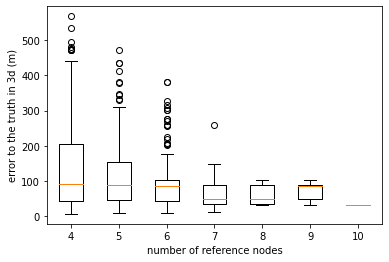

[]
[[9.711998421069039, 124.78819472775758, 124.58690204277292, 8.335363151986577, 124.66331980886024, 122.74227050421257, 91.50474472478625, 5.328557747807217, 59.560939401464985, 120.09236505293089, 9.958850323982102, 52.25735380967615, 3.034800745477302, 52.984359712853184, 21.48578591770868, 7.774081895914196, 130.78443000014843, 2.0377900780895435, 127.97274774657808, 164.483306847179, 3.832680615133962, 127.61795705506097, 5.155365379576432, 8.468940236212122, 89.84203254297204, 120.28441727872693, 61.101280574886424, 106.47669595480322, 198.8680701665858, 11.015691605675563, 13.308867392968615, 4.275875324194175, 7.781702966480825, 5.970127825581152, 7.790816598078208, 119.16746639990194, 4.58405644518127, 164.81688746873724, 77.6465204023074, 10.996169991294154, 211.45436837398776, 10.688208088502881, 16.163804639439196, 7.148031622225398, 9.154561119905917, 49.80261558678551, 8.469217817083731, 3.810317821376482, 310.77937908398513, 3.3765561592501405, 4.288624309639426, 161.1

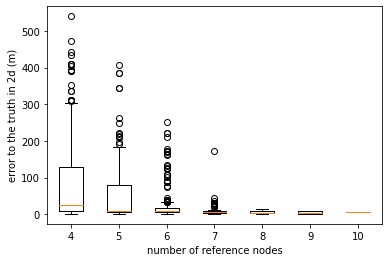

[]
[[9.711998421069039, 124.78819472775758, 124.58690204277292, 8.335363151986577, 124.66331980886024, 122.74227050421257, 91.50474472478625, 5.328557747807217, 59.560939401464985, 120.09236505293089, 9.958850323982102, 52.25735380967615, 3.034800745477302, 52.984359712853184, 21.48578591770868, 7.774081895914196, 130.78443000014843, 2.0377900780895435, 127.97274774657808, 164.483306847179, 3.832680615133962, 127.61795705506097, 5.155365379576432, 8.468940236212122, 89.84203254297204, 120.28441727872693, 61.101280574886424, 106.47669595480322, 198.8680701665858, 11.015691605675563, 13.308867392968615, 4.275875324194175, 7.781702966480825, 5.970127825581152, 7.790816598078208, 119.16746639990194, 4.58405644518127, 164.81688746873724, 77.6465204023074, 10.996169991294154, 211.45436837398776, 10.688208088502881, 16.163804639439196, 7.148031622225398, 9.154561119905917, 49.80261558678551, 8.469217817083731, 3.810317821376482, 310.77937908398513, 3.3765561592501405, 4.288624309639426, 161.1

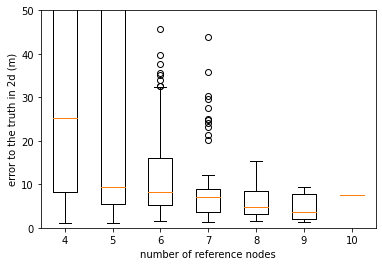

[]
[[0.11611161154857541, 0.3580141829006678, 0.3716067166665482, 0.37792142127946704, 0.3972873991339725, 0.4561259405220639, 0.4687885684414681, 0.5284713301985562, 0.5989078323736692, 0.6537239089993392, 0.6886028304907654, 0.7019857648778753, 0.7123007137008912, 0.7278134652157817, 0.7658112003129105, 0.7679673683339274, 0.8709388492843217, 0.895527930035307, 1.0412675078682554, 1.3083053024478275, 1.3343496160794501, 1.4421888093558977, 1.4601054894024443, 1.4737815654997348, 1.5371388541976074, 1.5748908141201952, 1.6033964245374435, 1.6419935285019776, 1.66068183299803, 1.7672012031603472, 1.7798758626514584, 1.863219276265589, 1.9052317315618694, 1.9626438756533702, 2.037107515336608, 2.0416925341231433, 2.092863897720555, 2.123253671952085, 2.161408202264603, 2.2000819939948713, 2.2271357024727223, 2.331945081002779, 2.337101329068922, 2.373569343466137, 2.3885719266658256, 2.3939950991196355, 2.436013097044686, 2.4853104528984034, 2.506155300440767, 2.5168676176001625, 2.5272

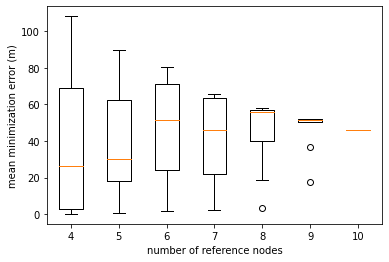

In [6]:
# visualization of multilateration with every pattern
# the relation between error to the truth and mean minimization error, number of reference nodes

error_answer_minimization.sort(key=lambda item: item[0])
plt.figure(facecolor="white")
plt.scatter([item[5] for item in error_answer_minimization], [item[1] for item in error_answer_minimization])
plt.xlabel("minimization loss error (m)")
plt.ylabel("error to the truth (m)")

#find line of best fit
# a, b = np.polyfit([item[0] for item in error_answer_minimization], [item[1] for item in error_answer_minimization], 1)

#add line of best fit to plot
# plt.plot(np.array([item[0] for item in error_answer_minimization]), a*np.array([item[0] for item in error_answer_minimization])+b)    
plt.show()

error_answer_minimization.sort(key=lambda item: item[0])
plt.figure(facecolor="white")
plt.scatter([item[5]/item[2] for item in error_answer_minimization], [item[1] for item in error_answer_minimization])
plt.xlabel("minimization loss error / number of nodes (m)")
plt.ylabel("error to the truth (m)")

#find line of best fit
# a, b = np.polyfit([item[0] for item in error_answer_minimization], [item[1] for item in error_answer_minimization], 1)

#add line of best fit to plot
# plt.plot(np.array([item[0] for item in error_answer_minimization]), a*np.array([item[0] for item in error_answer_minimization])+b)    
plt.show()

error_answer_minimization.sort(key=lambda item: item[0])
plt.figure(facecolor="white")
plt.scatter([item[0] for item in error_answer_minimization], [item[1] for item in error_answer_minimization])
plt.xlabel("mean minimization error (m)")
plt.ylabel("error to the truth (m)")

#find line of best fit
a, b = np.polyfit([item[0] for item in error_answer_minimization], [item[1] for item in error_answer_minimization], 1)

#add line of best fit to plot
# plt.plot(np.array([item[0] for item in error_answer_minimization]), a*np.array([item[0] for item in error_answer_minimization])+b)    
plt.show()

error_answer_minimization.sort(key=lambda item: item[0])
plt.figure(facecolor="white")
plt.scatter([item[0] for item in error_answer_minimization], [item[1] for item in error_answer_minimization])
plt.xlabel("mean minimization error (m)")
plt.ylabel("error to the truth (m)")
plt.xlim(0, 10)
plt.ylim(0, 200)
#find line of best fit
a, b = np.polyfit([item[0] for item in error_answer_minimization], [item[1] for item in error_answer_minimization], 1)

#add line of best fit to plot
# plt.plot(np.array([item[0] for item in error_answer_minimization]), a*np.array([item[0] for item in error_answer_minimization])+b)    
plt.show()

error_answer_minimization.sort(key=lambda item: item[0])
plt.figure(facecolor="white")
plt.scatter([item[3] for item in error_answer_minimization], [item[1] for item in error_answer_minimization])
plt.xlabel("standard deviation of minimization error")
plt.ylabel("error to the truth (m)")

#find line of best fit
a, b = np.polyfit([item[3] for item in error_answer_minimization], [item[1] for item in error_answer_minimization], 1)

#add line of best fit to plot
# plt.plot(np.array([item[0] for item in error_answer_minimization]), a*np.array([item[0] for item in error_answer_minimization])+b)    
plt.show()

plt.figure(facecolor="white")
error_answer_reference_boxplot = [[] for _ in range(20)]
print(error_answer_reference_boxplot[0])

for i in range(len(error_answer_minimization)):
    error_answer_reference_boxplot[error_answer_minimization[i][2]-4].append(error_answer_minimization[i][1])
print(error_answer_reference_boxplot)
plt.boxplot(error_answer_reference_boxplot[:7])
plt.xticks([i for i in range(1,8)],[i for i in range(4,11)])
plt.xlabel("number of reference nodes")
plt.ylabel("error to the truth in 3d (m)")
plt.show()

plt.figure(facecolor="white")
error_answer_reference_boxplot = [[] for _ in range(20)]
print(error_answer_reference_boxplot[0])

for i in range(len(error_answer_minimization)):
    error_answer_reference_boxplot[error_answer_minimization[i][2]-4].append(error_answer_minimization[i][4])
print(error_answer_reference_boxplot)
plt.boxplot(error_answer_reference_boxplot[:7])
plt.xticks([i for i in range(1,8)],[i for i in range(4,11)])
plt.xlabel("number of reference nodes")
plt.ylabel("error to the truth in 2d (m)")
plt.show()

plt.figure(facecolor="white")
error_answer_reference_boxplot = [[] for _ in range(20)]
print(error_answer_reference_boxplot[0])

for i in range(len(error_answer_minimization)):
    error_answer_reference_boxplot[error_answer_minimization[i][2]-4].append(error_answer_minimization[i][4])
print(error_answer_reference_boxplot)
plt.boxplot(error_answer_reference_boxplot[:7])
plt.xticks([i for i in range(1,8)],[i for i in range(4,11)])
plt.xlabel("number of reference nodes")
plt.ylabel("error to the truth in 2d (m)")
plt.ylim(0, 50)
plt.show()

plt.figure(facecolor="white")
error_answer_reference_boxplot = [[] for _ in range(20)]
print(error_answer_reference_boxplot[0])

for i in range(len(error_answer_minimization)):
    error_answer_reference_boxplot[error_answer_minimization[i][2]-4].append(error_answer_minimization[i][0])
print(error_answer_reference_boxplot)
plt.boxplot(error_answer_reference_boxplot[:7])
plt.xticks([i for i in range(1,8)],[i for i in range(4,11)])
plt.xlabel("number of reference nodes")
plt.ylabel("mean minimization error (m)")
plt.show()

In [7]:
# [np.mean(errors_array[-1]), error_answer, len(distance), np.std(errors_array[-1]), error_answer_2d]
for i in range(len(error_answer_minimization)):
    if error_answer_minimization[i][2] == 10:
        print(error_answer_minimization[i])
print(d_iter[-1])
print(d)

[45.984821321478705, 33.71250556355943, 10, 92.61001526951509, 7.53257661433362, 455.3264721847198]
[489.3588074217971, 240.65689095825144, 192.2947928449276, 559.5039227350577, 287.7506871248685, 355.36152157821056, 297.7740251687397, 317.15525160163276, 520.4489797985229, 151.88665572438723]
[489.3588074217971, 240.65689095825144, 192.2947928449276, 559.5039227350577, 287.7506871248685, 355.36152157821056, 297.7740251687397, 317.15525160163276, 520.4489797985229, 151.88665572438723]


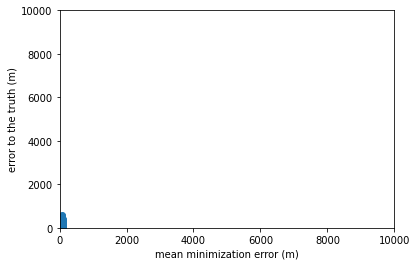

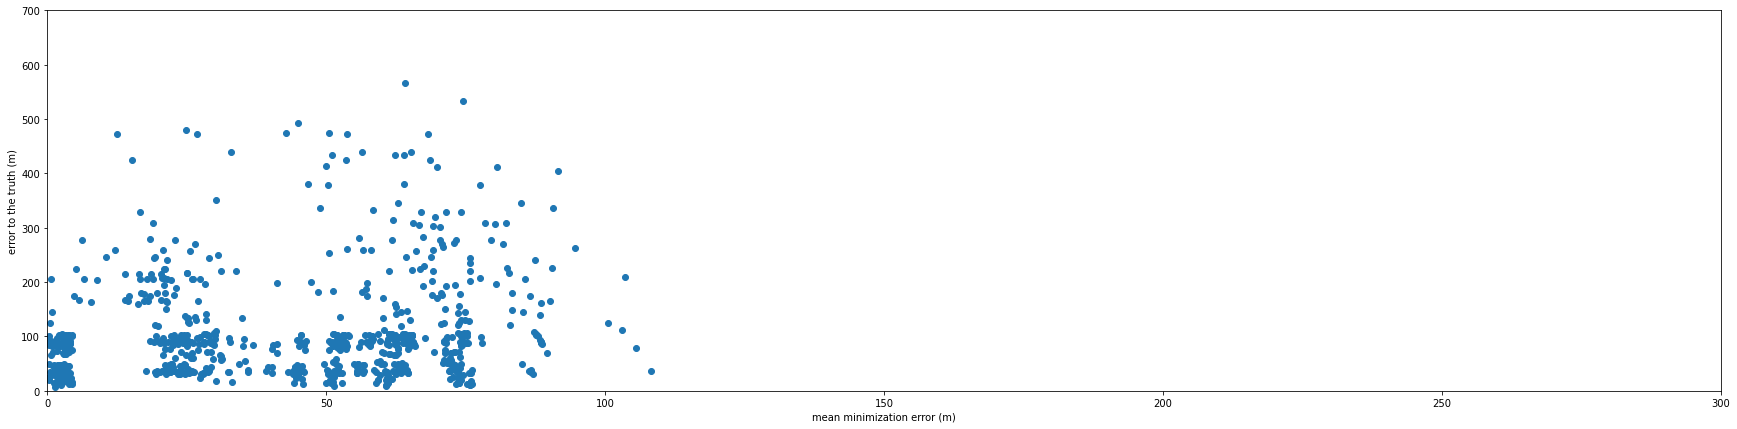

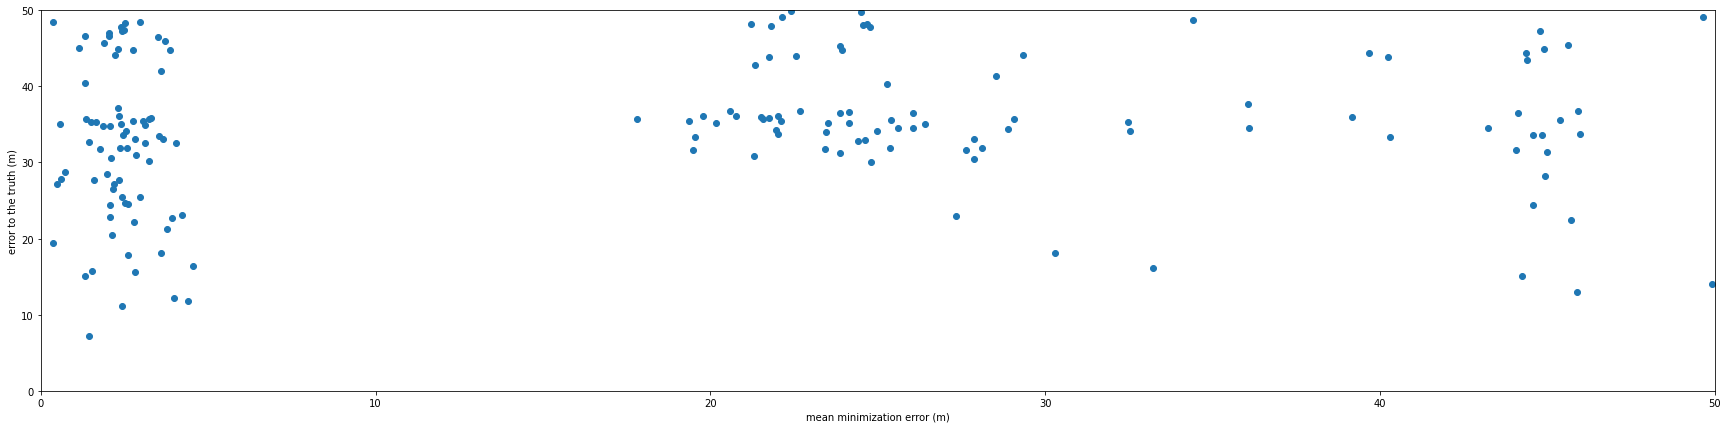

In [8]:
error_answer_minimization.sort(key=lambda item: item[0])
plt.figure(facecolor="white")
plt.scatter([item[0] for item in error_answer_minimization], [item[1] for item in error_answer_minimization])
plt.xlabel("mean minimization error (m)") # error between the measured distance and estimated distance
plt.ylabel("error to the truth (m)")
plt.xlim(0, 10000)
plt.ylim(0, 10000)
plt.show()
error_answer_minimization.sort(key=lambda item: item[0])
plt.figure(figsize=(30,7),facecolor="white")
plt.scatter([item[0] for item in error_answer_minimization], [item[1] for item in error_answer_minimization])
plt.xlabel("mean minimization error (m)") # error between the measured distance and estimated distance
plt.ylabel("error to the truth (m)")
plt.xlim(0, 300)
plt.ylim(0, 700)
plt.show()
error_answer_minimization.sort(key=lambda item: item[0])
plt.figure(figsize=(30,7),facecolor="white")
plt.scatter([item[0] for item in error_answer_minimization], [item[1] for item in error_answer_minimization])
plt.xlabel("mean minimization error (m)") # error between the measured distance and estimated distance
plt.ylabel("error to the truth (m)")
plt.xlim(0, 50)
plt.ylim(0, 50)
plt.show()